# EDA test notebook

In [140]:
# import required packages
import os

import pandas as pd
import numpy as np
import math
from functions import *

import matplotlib.pyplot as plt

In [27]:
# function to load most shared articles for eda
def load_most_shared_eda(dir_path):
#     'data/most_popular'
    directory = os.fsencode(dir_path)
    
    files = []
    most_shared_df = pd.DataFrame()
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        exclude = 'before'
        if filename.endswith('.csv') and exclude not in filename :
            files.append(filename)
            
    #read them into pandas
    df_list = [pd.read_csv(dir_path+'/'+file) for file in files]
    
    return df_list

In [28]:
# fucntion to clean most shared articles for eda
def clean_most_shared_eda(df_list):
    
    for df in df_list:
        df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())
        df.date_sourced = df.date_sourced.apply(lambda x: pd.to_datetime(x).date())
        df.set_index('date_sourced', inplace=True)
        df.sort_index(ascending=False, inplace=True)
    df_list.sort(key=lambda x: x.index[0])
    return df_list
    

In [29]:
# generate a grid of subplots that fits legnth of list, plot dataframes in list
def plot_most_shared(list_df):
    
    size = len(list_df)
    cols = round(math.sqrt(size))
    rows = cols
    while rows * cols < size:
        rows += 1
    f, ax_arr = plt.subplots(rows, cols)
    plt.rcParams["figure.figsize"] = (20,20)
    ax_arr = ax_arr.reshape(-1)
    for i in range(len(ax_arr)):
        if i >= size:
            ax_arr[i].axis('off')
            break

        list_df[i].groupby('date_published').count().plot(kind='bar', 
                                                          title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                          rot=50, xlabel='Date Published', 
                                                          ylabel='Number of Articles', ax=ax_arr[i]);
        ax_arr[i].legend(['Articles'])
        
#     plt.subplot_tool();

In [30]:
pd.to_datetime('12/01/10').date()

datetime.date(2010, 12, 1)

In [31]:
df_list_load = load_most_shared_eda('data/most_popular_train')
df_list = clean_most_shared_eda(df_list_load)

In [32]:
# df_list = df_list.sort(key=lambda x: x.index[0])

In [33]:
# df_list.sort(key=lambda x: x.index[0])

In [34]:
# df_list

In [38]:
li = [1,1,2,3,4,4,5,5,5,5,6,6,7,7,7,7]

In [ ]:
test_dict =

In [43]:
test = df_list[0].date_published.value_counts()
test

2022-01-08    9
2022-01-09    7
2022-01-07    3
2022-01-10    1
Name: date_published, dtype: int64

In [51]:
list(zip(test.index, test.values))

[(datetime.date(2022, 1, 8), 9),
 (datetime.date(2022, 1, 9), 7),
 (datetime.date(2022, 1, 7), 3),
 (datetime.date(2022, 1, 10), 1)]

In [52]:
[day_sourced - x for x in test.index]

Index([2022-01-08, 2022-01-09, 2022-01-07, 2022-01-10], dtype='object')

In [99]:
date = str(test.index[0])
date

'2022-01-08'

In [101]:
date

'2022-01-08'

In [106]:
date_list = []
for df in df_list:
    day_sourced = df.index[0]
    value_count = df.date_published.value_counts()
    time_delta = [day_sourced - date for date in value_count.index]
    date_dict = {k:v for k,v in list(zip(time_delta, value_count.values))}
    date_series = pd.Series(date_dict, name=str(day_sourced))
    date_list.append(date_series)
    
date_list[:2]

[2 days    9
 1 days    7
 3 days    3
 0 days    1
 Name: 2022-01-10, dtype: int64,
 1 days    11
 2 days     7
 4 days     2
 Name: 2022-01-11, dtype: int64]

In [ ]:
df['sum'] = df[list(df.columns)].sum(axis=1)

In [153]:
test_df = pd.DataFrame(date_list).T
num_days = len(test_df.columns)
test_df['percentage'] = 0
test_df.fillna(0, inplace=True)
test_df['percentage'] = round((test_df.sum(axis=1))/(num_days*20), 4)
test_df

,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,percentage
0 days,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0278
1 days,7.0,11.0,10.0,8.0,16.0,8.0,4.0,7.0,9.0,0.4444
2 days,9.0,7.0,8.0,9.0,4.0,12.0,12.0,11.0,9.0,0.4500
3 days,3.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0556
4 days,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0167
5 days,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0056


In [154]:
test_df.percentage.sum()

1.0001

In [229]:
test_df.percentage.round(2).apply(lambda x: str(int(x*100))+'%')

0 days     3%
1 days    44%
2 days    45%
3 days     6%
4 days     2%
5 days     1%
Freq: D, Name: percentage, dtype: object

In [230]:
def top_20_delta_perc(df_list):
    
    date_list = []
    for df in df_list:
        day_sourced = df.index[0]
        value_count = df.date_published.value_counts()
        time_delta = [day_sourced - date for date in value_count.index]
        date_dict = {k:v for k,v in list(zip(time_delta, value_count.values))}
        date_series = pd.Series(date_dict, name=str(day_sourced))
        date_list.append(date_series)
        
    top20_delta_df = pd.DataFrame(date_list).T
    num_days = len(top20_delta_df.columns)
    top20_delta_df['percentage'] = 0
    top20_delta_df.fillna(0, inplace=True)
    top20_delta_df['percentage'] = round((top20_delta_df.sum(axis=1))/(num_days*20), 4)
    delta = top20_delta_df.percentage
    
    X = [str(x)+' days' for x in list(delta.index.days)]
    plt.bar(X, delta.values, figsize=(5,5))
    plt.title('Time Delta Distribution', size=25, pad=10)
    plt.xlabel('Days Published Before Day on Top 20', size=20, labelpad=10)
    plt.ylabel('Percentage of Total Articles', size=20, labelpad=10)
    plt.xticks(size=15)
    plt.yticks([0, .10, .20, .30, .40, .50], labels=['0%', '10%', '20%', '30%', '40%', '50%'], size=15)
    plt.legend(['Articles'], prop={'size': 20});

    return delta.round(2).apply(lambda x: str(int(x*100))+'%').to_frame()
    

,percentage
0 days,3%
1 days,44%
2 days,45%
3 days,6%
4 days,2%
5 days,1%


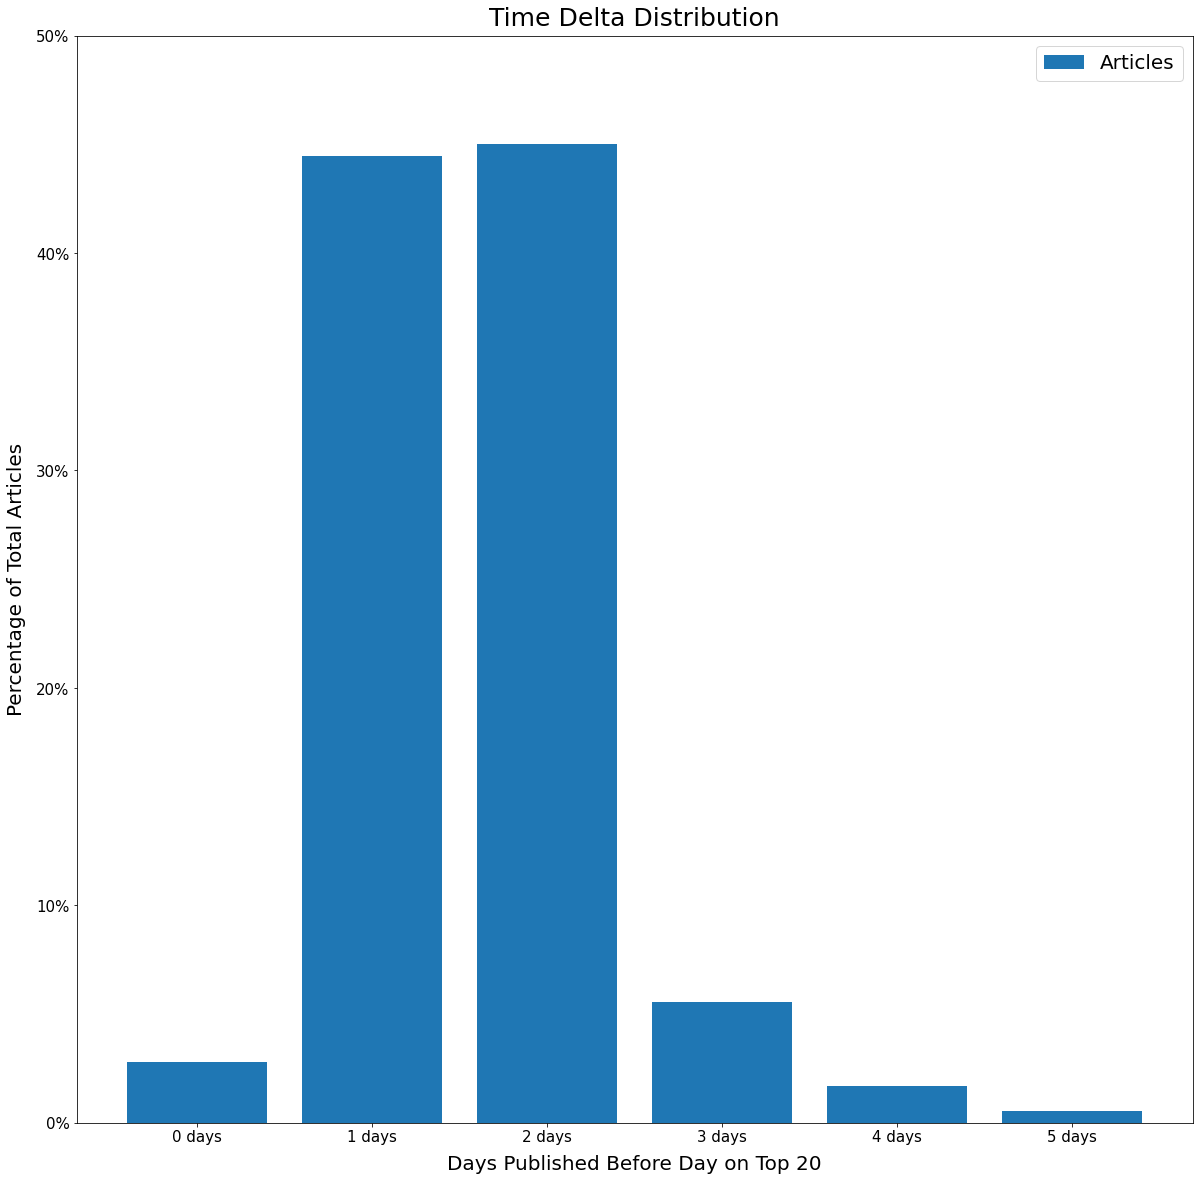

In [233]:
top_20_delta = top_20_delta_perc(df_list)
top_20_delta

In [234]:
top_20_delta

,percentage
0 days,3%
1 days,44%
2 days,45%
3 days,6%
4 days,2%
5 days,1%


In [144]:
test_df['percentage'] = 

,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18
0 days,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
1 days,7.0,11.0,10.0,8.0,16.0,8.0,4.0,7.0,9.0
2 days,9.0,7.0,8.0,9.0,4.0,12.0,12.0,11.0,9.0
3 days,3.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
4 days,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5 days,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
test_df.percentage

0 days    0.0278
1 days    0.4444
2 days    0.4500
3 days    0.0556
4 days    0.0167
5 days    0.0056
Freq: D, Name: percentage, dtype: float64

In [171]:
[str(x)+' days' for x in list(test_df.percentage.index.days)]

['0 days', '1 days', '2 days', '3 days', '4 days', '5 days']

In [174]:
test_df.percentage.values

array([0.0278, 0.4444, 0.45  , 0.0556, 0.0167, 0.0056])

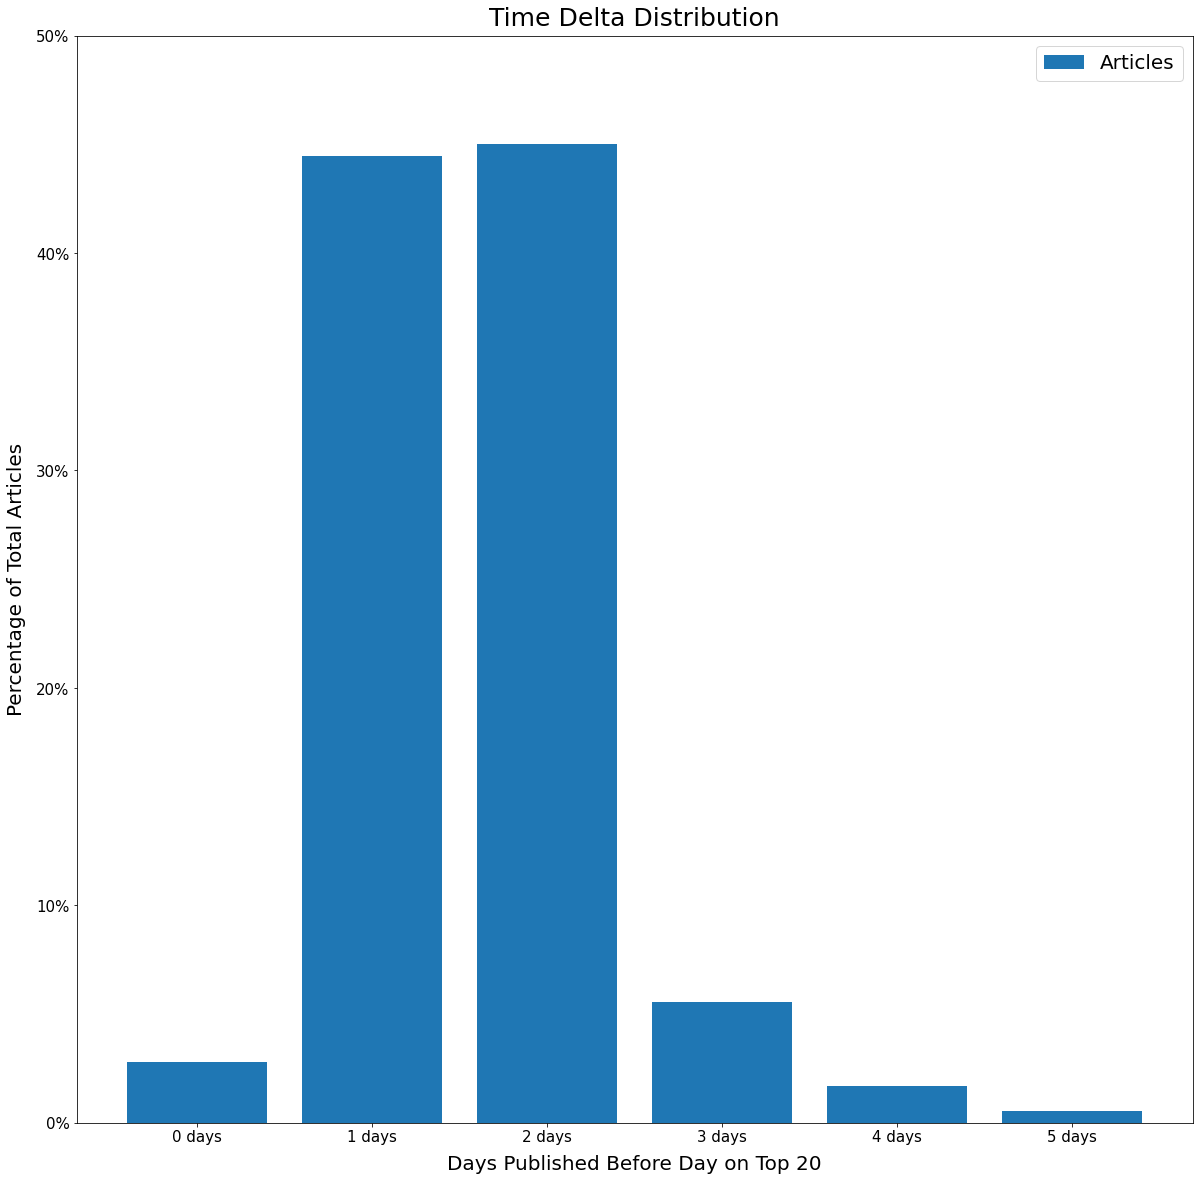

In [210]:
X = [str(x)+' days' for x in list(test_df.percentage.index.days)]
plt.bar(X, test_df.percentage.values)
plt.title('Time Delta Distribution', size=25, pad=10)
plt.xlabel('Days Published Before Day on Top 20', size=20, labelpad=10)
plt.ylabel('Percentage of Total Articles', size=20, labelpad=10)
plt.xticks(size=15)
plt.yticks([0, .10, .20, .30, .40, .50], labels=['0%', '10%', '20%', '30%', '40%', '50%'], size=15)
plt.legend(['Articles'], prop={'size': 20});

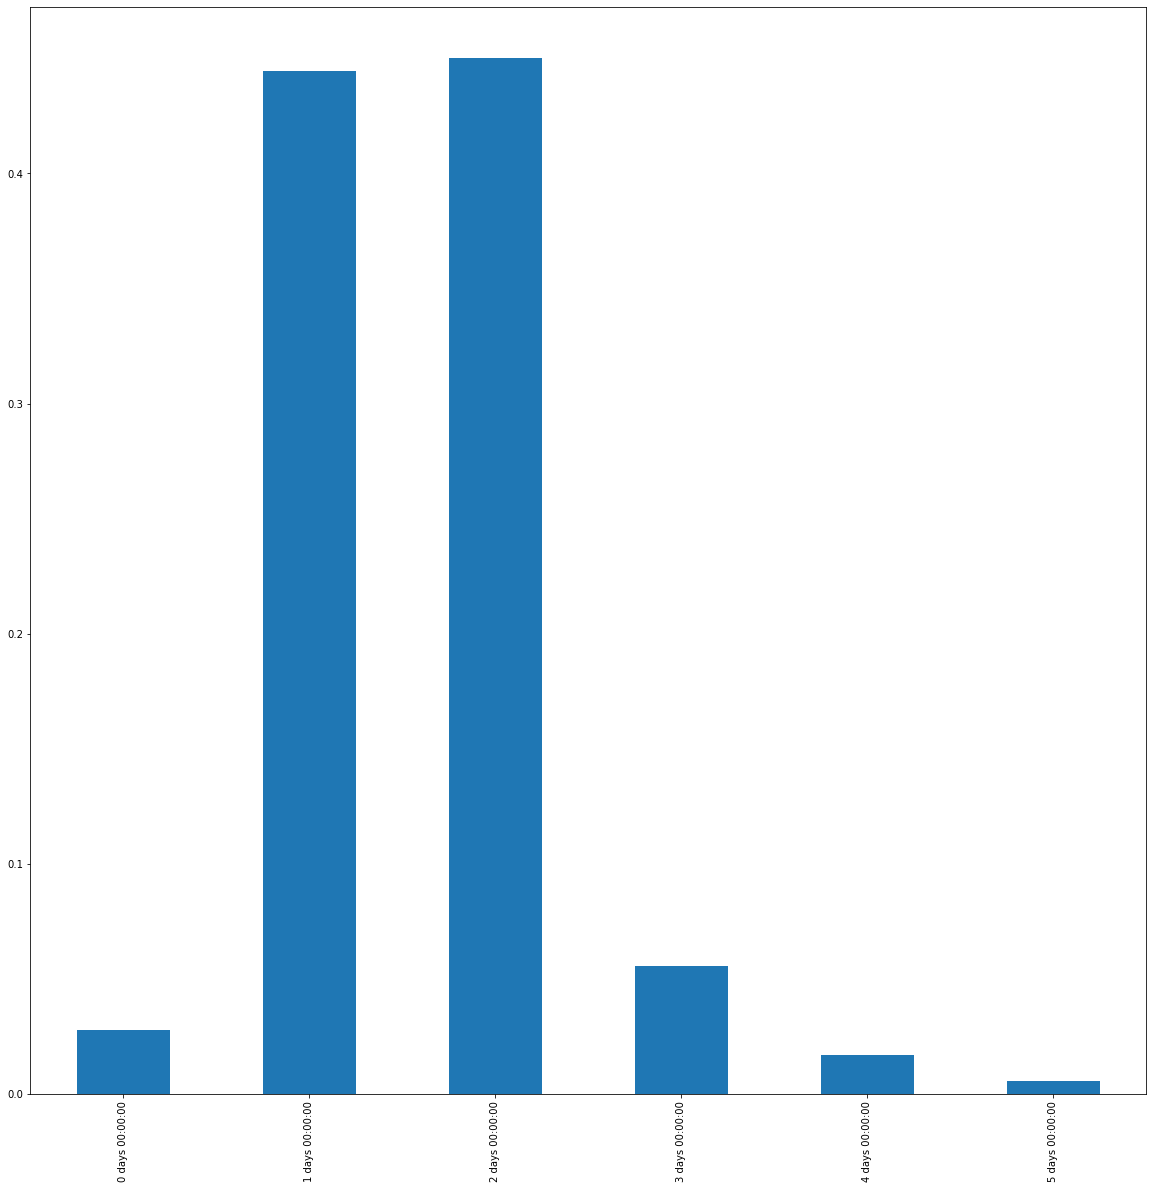

In [157]:
test_df.percentage.plot(kind='bar');

In [138]:
normalized_df['percentage'] = normalized_df.sum()/len(normalized_df.columns)
normalized_df

,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,percentage
0 days,0.111111,0.000000,0.0,0.111111,0.00,0.000000,0.250000,0.000000,0.000000,NaN
1 days,0.777778,1.000000,1.0,0.888889,1.00,0.666667,0.333333,0.636364,1.000000,NaN
2 days,1.000000,0.636364,0.8,1.000000,0.25,1.000000,1.000000,1.000000,1.000000,NaN
3 days,0.333333,0.000000,0.1,0.222222,0.00,0.000000,0.083333,0.181818,0.111111,NaN
4 days,0.000000,0.181818,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,NaN
5 days,0.000000,0.000000,0.1,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,NaN


In [139]:
tester = test_df.groupby().mean()

TypeError: You have to supply one of 'by' and 'level'

In [136]:
normalized_df.iloc[: ,0]

0 days    0.111111
1 days    0.777778
2 days    1.000000
3 days    0.333333
4 days    0.000000
5 days    0.000000
Freq: D, Name: 2022-01-10, dtype: float64

In [137]:
normalized_df.iloc[: ,0].sum()

2.2222222222222223

In [133]:
normalized_df.percentage.sum()

1.8762626262626263

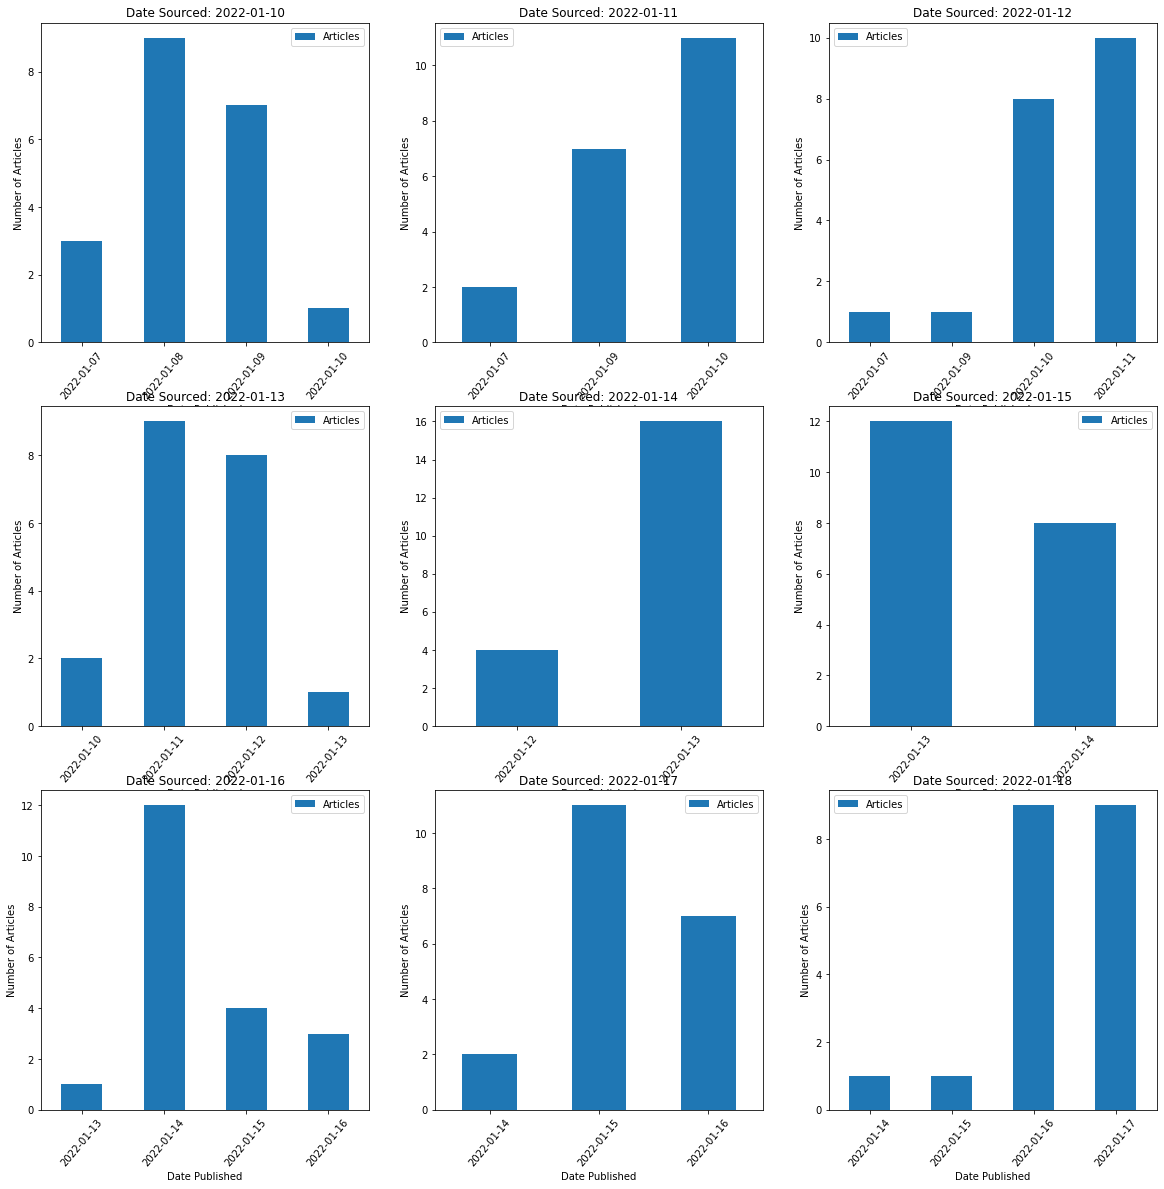

In [35]:
plot_most_shared(df_list)

In [78]:
len(df_list)

3

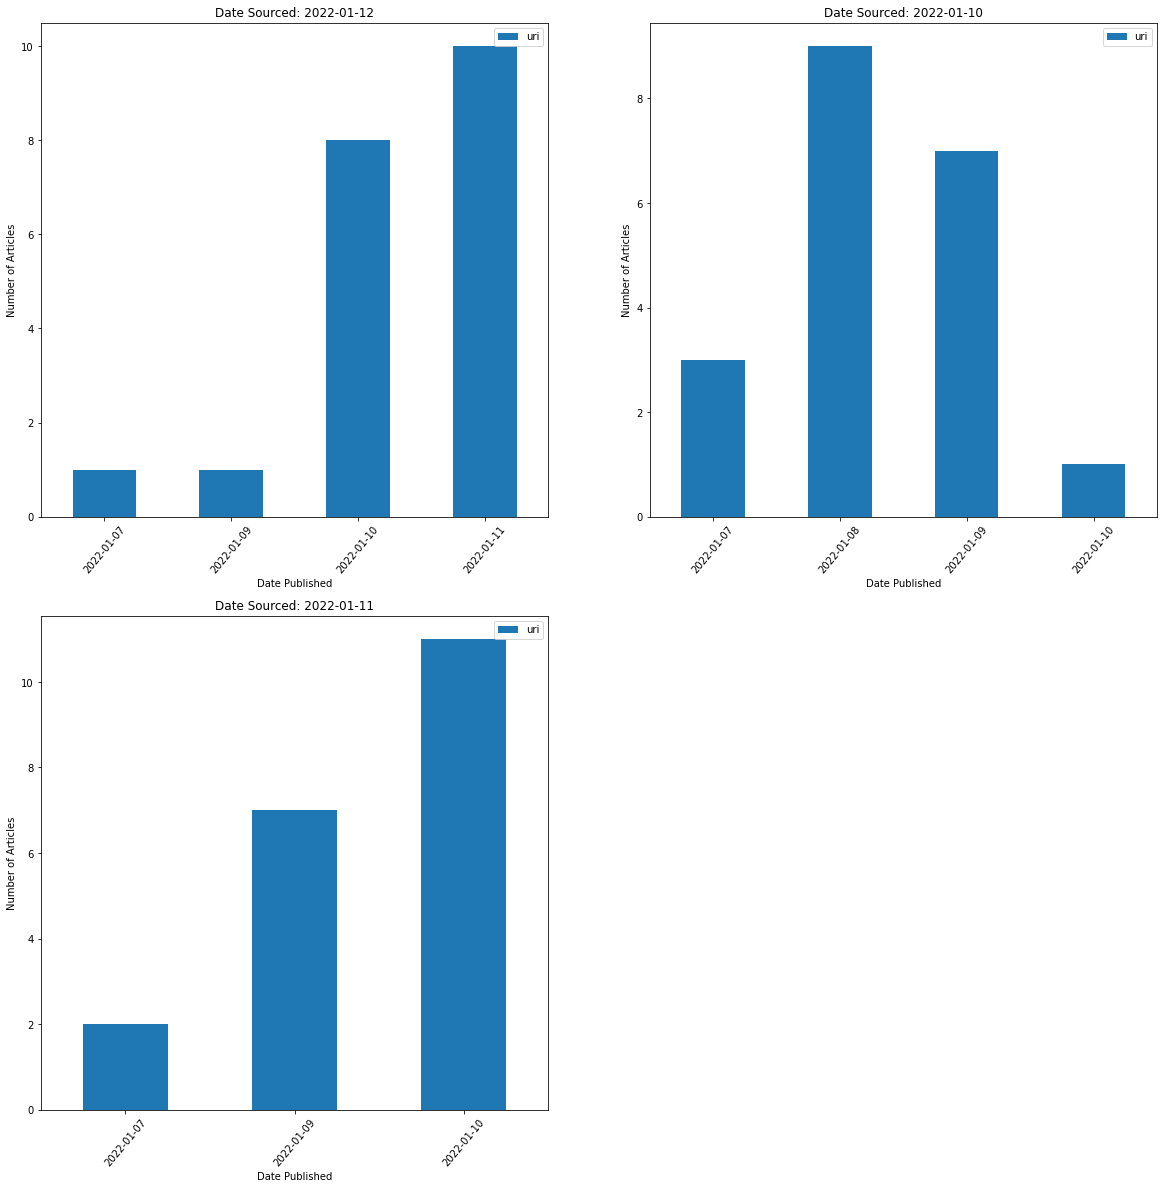

In [81]:
size = len(df_list)
cols = round(math.sqrt(size))
rows = cols
while rows * cols < size:
    rows += 1
f, ax_arr = plt.subplots(rows, cols)
plt.rcParams["figure.figsize"] = (20,20)
ax_arr = ax_arr.reshape(-1)
for i in range(len(ax_arr)):
    if i >= size:
        ax_arr[i].axis('off')
        break
        
    df_list[i].groupby('date_published').count().plot(kind='bar', 
                                                      title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                      rot=50, xlabel='Date Published', 
                                                      ylabel='Number of Articles', ax=ax_arr[i]);
# plt.subplot_tool();

In [2]:
df = pd.read_csv('data/archive_train.csv')
df.dropna(inplace=True)

df_most_shared = load_most_shared('data/most_popular_train')
df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())

In [3]:
popular_list = df_most_shared.uri.values
df['popular'] = [1 if x in popular_list else 0 for x in df['uri']]

In [4]:
df.head()

,uri,date_published,headline,keywords,snippet,word_count,popular
0,nyt://article/4e2abcbc-9563-56c0-bf18-c93ce4e7...,2021-12-01,let’s end the covid blame games,coronavirus omicron variantcoronavirus (2019-n...,"Finger pointing is pointless, divisive and dumb.",918,0
1,nyt://article/f7a5e7ef-e4cd-575c-a0e1-ff4d18d5...,2021-12-01,trump’s iran policy has become a disaster for ...,irannuclear weaponsembargoes and sanctionsunit...,Withdrawing from the Iran nuclear deal was a m...,1560,0
2,nyt://article/778af86c-b600-5aeb-be98-0a9a1aa1...,2021-12-01,this extinct eagle may have gulped guts like a...,eagles (birds)vultures (birds)condorsendangere...,Scientists suggest the largest eagle that ever...,913,0
3,nyt://article/fb7763c2-0f41-5c81-9ecf-17607ba5...,2021-12-01,republican recriminations point to a rocky pat...,republican partyhouse of representativesboeber...,Simmering tensions between the far-right flank...,1172,0
4,nyt://article/ba0afd37-0c00-5535-8868-21130e28...,2021-12-01,a times editor who attended oxford recalls a d...,school shootings and armed attacks,Three teenage students were killed on Tuesday ...,309,0
